<a href="https://colab.research.google.com/github/minoooo119/deeplearning_study/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭐️ 로지스틱 회귀 (Logistic Regression)

🤩 두개의 선택지 중에서 정답을 고르는 문제 : 이진 분류
>이진 분류 해결을 위한 대표적인 알고리즘 **Logistic Regression**


## ☑️ 이진 분류 (binary classification)
불합격 합격 여부 판정 모델 존재  
해당 모델의 점들을 그래프로 표현시 알파벳의 S자 형태로 표현됨.  
관계를 표현하기 위한 $Wx + b$와 같은 함수 필요.



## ☑️ 시그모이드 함수 (Sigmoid function)
해당 S자 형태로 그래프를 그려주는 함수임
> 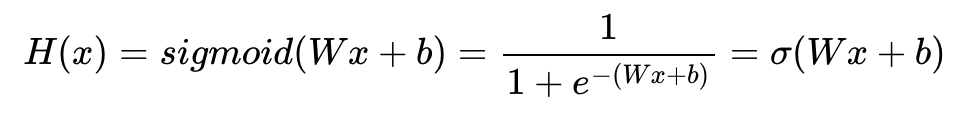
  


In [1]:
#그래프 그릴 수 있는 도구 Matplotlib
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x)) #numpy 이용하여 시그모이드 함수 정의

### 💬 W가 1이고 b가 0인 그래프
출력값을 0과 1사이로 조정하여 반환   
x가 매우 커지면 1에 수렴, 작아지면 0에 수렴

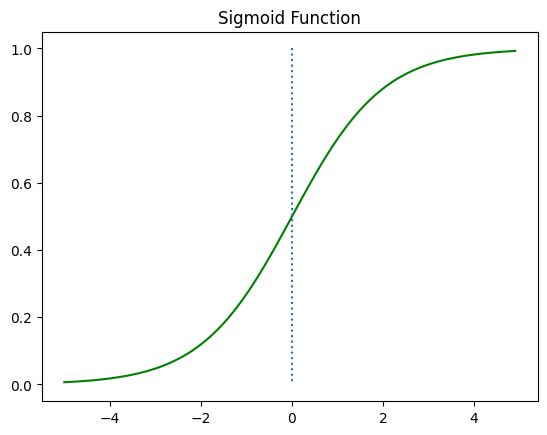

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 💬 W값 변화에 따른 경사도의 변화

W의 값을 변화시키고 이에 따른 그래프의 변화  
선형 회귀에서 W는 직선의 기울기를 의미  
여기서는 경사도를 결정 => W가 커지면 경사가 커지고 작아지면 경사가 작아진다.

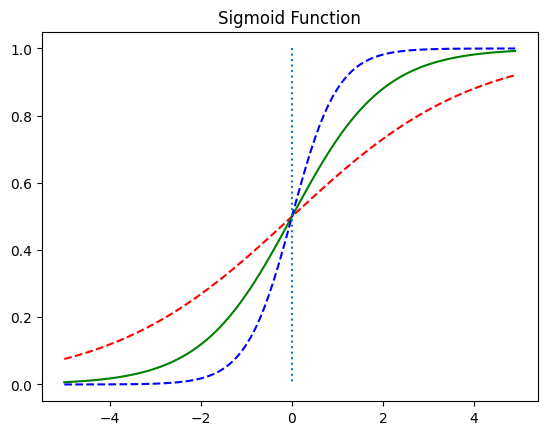

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때  --> 빨간 점선
plt.plot(x, y2, 'g') # W의 값이 1일때  --> 초록 실선
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때 --> 파랑 점선
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
#w가 커질 수록 급격하게 1과 0에 가까워진다.

### 💬 b값에 변화에 따른 좌우 이동
b의 값에 따라 그래프 모양 변화
b의 값에 따라 그래프가 좌우로 이동함

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


## ☑️ 비용 함수
선형 회귀때와는 다르게 해야함  
선형 회귀때 처럼 평균 제곱 오차 사용시에는 심한 비볼록 형태 그래프가 됨  
>시그 모이드 함수 특징 : 출력값이 0과 1사이라는 점    

위 특징을 만족하는 로그 함수를 할용한다.  
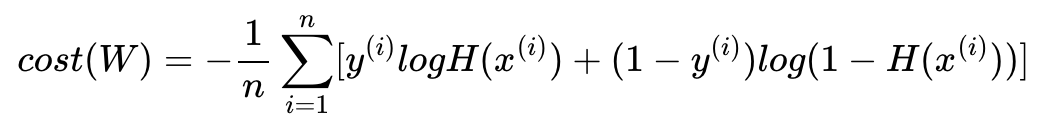  
실제 값 y가 1이라고 하면 우측 항 사라짐 반대로 0이라고 하면 좌측 항 사라짐.  
선형 회귀에서의 모든 오차의 평균을 구해 평균 제곱 오차를 사용하는 것처럼 모든 오차의 평균을 구한다.  
즉, 비용 함수는 실제값 y와 예측값 H(x)의 차이가 커지면 cost가 커진다. 이 후 비용 함수에 따라 경사하강법을 수행하면서 최적의 가중치 W를 찾아나간다.

## ☑️ 파이토치로 구현하기
x로 부터 y 예측하는 다중 로지스틱 회귀 구현

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

#훈련 데이터 선언
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

#가중치와 b선언
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1, 하나의 데이터당 특성이 2개 존재 --> 결과는 1개 0 or 1임
b = torch.zeros(1, requires_grad=True)

#가정 함수
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
#위의 식 간단하게 sigmoid 활용
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

#모든 원소에 대해서 오차 계산
losses = -(y_train * torch.log(hypothesis) +
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)


tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [10]:
#전체 오차에 대한 평균 계산
cost = losses.mean()
print(cost)
#아래처럼 이미 구현된 파이토치의 로지스틱 회귀 비용함수 사용 가능
F.binary_cross_entropy(hypothesis, y_train)  # F.binary_cross_entropy(예측값, 실제값)

#cost 0.6931 이제 훈련 과정 추가해보자

tensor(0.6931, grad_fn=<MeanBackward0>)


tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


In [12]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)  #lr = learning rate임

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)  #matmul은 일반적인 행렬 곱셈임
    cost = -(y_train * torch.log(hypothesis) +
             (1 - y_train) * torch.log(1 - hypothesis)).mean() #평균 오차임

    # cost로 H(x) 개선
    optimizer.zero_grad() #초기화 하고 해야함 안그러면 중첩됨
    cost.backward()  # cost함수 가중치에 대해서 미분
    optimizer.step()  #가중치, b 수정 --> 가중치에 대해서 미분한 값을 학습률을 곱해서 기존 가중치에서 빼줌

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [16]:
#훈련 데이터 그대로 입력하여 예측 확인
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)
#0과 1사이의 값인데 0.5를 기준으로 true, false 출력하도록
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

#기존의 값이 0, 0, 0, 1, 1, 1 이므로 결과 잘 예측함

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [31]:
#훈련끝난 가중치와 b 출력해보기
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


# ⭐️ nn.Module로 구현한 로지스틱 회귀
 > 선형 회귀 가설식 : $H(x)=Wx+b$ -> nn.Linear() 사용

 > 로지스틱 회귀 가설식: $H(x)=sigmoid(Wx+b)$ --> nn.Sigmoid() 통해서 진행

## 구현 코드


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

#훈련 데이터
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [33]:
#nn.Sequential() --> Module 층으로 쌓게 해줌
#Wx+b -> sigmoid(Wx+b) 도와주는 듯

model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)
#해당 가중치와 b는 랜덤 초기화 되어있음

In [34]:
model(x_train) #현재 예측값 확인

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [35]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산 --> 로그식으로 해도되지만 구현된거 쓰는게 좋음
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614852 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [36]:
#훈련 완료된 W, b 확인
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


인공신경망으로 표현될 수 있긴함  
가중치와 x값을 통해 예측값 y가 나오긴해서  
**❗️그러나 인공신경망의 은닉층에서 거의 사용되지 않음**

# ⭐️ 클래스로 모델 구현
Class로 구현하기

In [37]:
#####################앞에서 구현한 로지스틱 회귀 모델#####################
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)
#####################앞에서 구현한 로지스틱 회귀 모델#####################


#####################클래스로 구현하면 아래와 같음#####################
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x): #forward 함수는 H(x)에 x값을 넣어서 예측값을 반환하는 함수
        return self.sigmoid(self.linear(x))
#####################클래스로 구현하면 아래와 같음#####################

클래스로 주로 사용하기 때문에 필히 숙지 필요하다고 함  
상속받는 forward함수가 H(x) 예측함수임

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))


model = BinaryClassifier()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train) #모델과 데이터를 함께 호출하면 자동 실행됨 --> 즉, forward() 함수 실행

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614852 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00